Описание в doc/05_statement-gbm.pdf

In [71]:
import math
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split  

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def sigmoid(y_pred):
    return 1.0 / (1.0 + math.exp(-y_pred))

In [48]:
def save_answer(name, value):
    with open('data/statement-gbm_' + name + '.txt', 'w', encoding='utf-8') as f:
        f.write(value)

In [49]:
df = pd.read_csv('data/gbm-data.csv')

In [50]:
X = df.drop('Activity', axis=1)
y = df.Activity

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [61]:
for learning_rate in [0.2]:
    #[1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    results_train = []
    for pred in clf.staged_decision_function(X_train):
        results_train.append(log_loss(y_train, [sigmoid(y_pred) for y_pred in pred]))
        
    results_test = []
    for pred in clf.staged_decision_function(X_test):
        results_test.append( log_loss(y_test,  [sigmoid(y_pred) for y_pred in pred]))   

      Iter       Train Loss   Remaining Time 
         1           1.2613           11.21s
         2           1.1715           11.17s
         3           1.1009           11.12s
         4           1.0529           11.02s
         5           1.0130           11.23s
         6           0.9740           11.19s
         7           0.9475           10.49s
         8           0.9197           10.47s
         9           0.8979           10.00s
        10           0.8730            9.97s
        20           0.7207            8.40s
        30           0.6055            8.04s
        40           0.5244            7.28s
        50           0.4501            6.72s
        60           0.3908            6.28s
        70           0.3372            5.95s
        80           0.3009            5.69s
        90           0.2603            5.38s
       100           0.2327            4.96s
       200           0.0835            1.56s


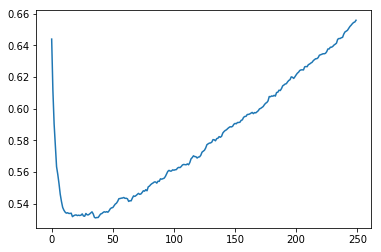

In [62]:
plt.plot(range(len(results_test)), results_test, label='test')

In [65]:
save_answer('1', 'overfitting')

In [68]:
round(min(results_test), 2)

0.53000000000000003

In [66]:
for i in range(len(results_test)):
    if results_test[i]==min(results_test):
        print(i)

36


In [69]:
save_answer('2', '0.53 36')

In [74]:
clf = RandomForestClassifier(n_estimators=36, random_state=241)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
round(test_loss, 2)

0.54000000000000004

In [75]:
save_answer('3', '0.54')

______